If the file is a zipped file, we are supposed to unzip it.

In [ ]:
!unzip -u "/content/drive/MyDrive/Dataset for DL/BrainTumour.zip" -d "/content/drive/MyDrive/Dataset for DL/BrainTumour"

Archive:  /content/drive/MyDrive/Dataset for DL/BrainTumour.zip
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (47).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (48).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (49).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (5).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (50).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (51).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (60).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (61).jpg  
  inflating: /content/drive/MyDrive/Dataset for DL/BrainTumour/Training/meningioma_tumor/m2 (62).jpg  
  inflatin

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [ ]:
train_path= '/content/drive/MyDrive/Dataset for DL/BrainTumour/Training'
test_path= '/content/drive/MyDrive/Dataset for DL/BrainTumour/Testing'

**Data Augmentation**

verify tensorflow official site to understand more about data augmentation.

In [ ]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_batches=train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=32,
    subset='training',
    class_mode='categorical'

)

validation_batches=train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=32,
    subset='validation',
    class_mode='categorical'

)

Found 2681 images belonging to 4 classes.
Found 668 images belonging to 4 classes.


In [ ]:
test_batches=test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'

)

Found 394 images belonging to 4 classes.


**Building a CNN model**

In [ ]:
model=Sequential()
model.add(Conv2D(32,3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Conv2D(64,3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(MaxPool2D())
model.add(Flatten())
#hidden layer 1
model.add(Dense(128,activation='relu'))

#hidden layer 2
model.add(Dense(64,activation='relu'))

#hidden layer 3
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [ ]:
#compiling the model

model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
#from tensorflow.keras.callbacks import EarlyStopping

#training the model

history=model.fit(x=train_batches,
                  validation_data=validation_batches,
                  epochs=7,
                  verbose=2)

Epoch 1/7
84/84 - 17s - loss: 0.7968 - accuracy: 0.7210 - val_loss: 1.2093 - val_accuracy: 0.4731 - 17s/epoch - 196ms/step
Epoch 2/7
84/84 - 14s - loss: 0.6171 - accuracy: 0.7837 - val_loss: 1.1804 - val_accuracy: 0.5299 - 14s/epoch - 164ms/step
Epoch 3/7
84/84 - 14s - loss: 0.4886 - accuracy: 0.8426 - val_loss: 1.1396 - val_accuracy: 0.5509 - 14s/epoch - 168ms/step
Epoch 4/7
84/84 - 15s - loss: 0.3989 - accuracy: 0.8713 - val_loss: 1.3442 - val_accuracy: 0.6003 - 15s/epoch - 173ms/step
Epoch 5/7
84/84 - 16s - loss: 0.2903 - accuracy: 0.9254 - val_loss: 1.3256 - val_accuracy: 0.5763 - 16s/epoch - 185ms/step
Epoch 6/7
84/84 - 18s - loss: 0.2330 - accuracy: 0.9355 - val_loss: 1.3045 - val_accuracy: 0.6332 - 18s/epoch - 213ms/step
Epoch 7/7
84/84 - 15s - loss: 0.1830 - accuracy: 0.9579 - val_loss: 1.5633 - val_accuracy: 0.5943 - 15s/epoch - 176ms/step


In [ ]:
predictions = model.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)

In [ ]:
print(model.evaluate(x=test_batches))

13/13 [==============================] - 2s 125ms/step - loss: 2.9513 - accuracy: 0.6320
[2.9512999057769775, 0.6319797039031982]


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=1))

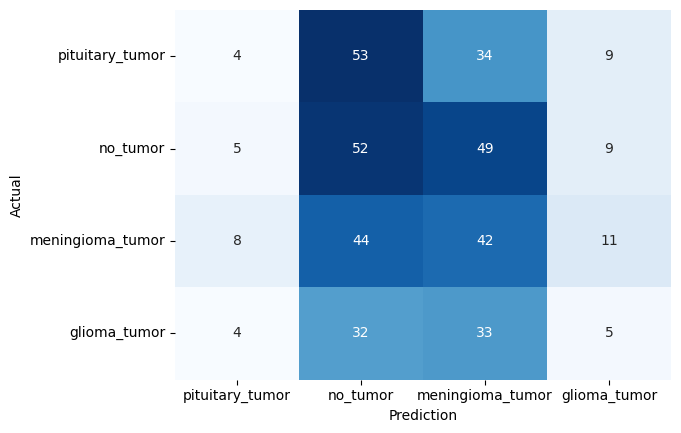

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, xticklabels=["pituitary_tumor",'no_tumor',"meningioma_tumor","glioma_tumor"], yticklabels=["pituitary_tumor",'no_tumor',"meningioma_tumor","glioma_tumor"], cbar=False,cmap='Blues')

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

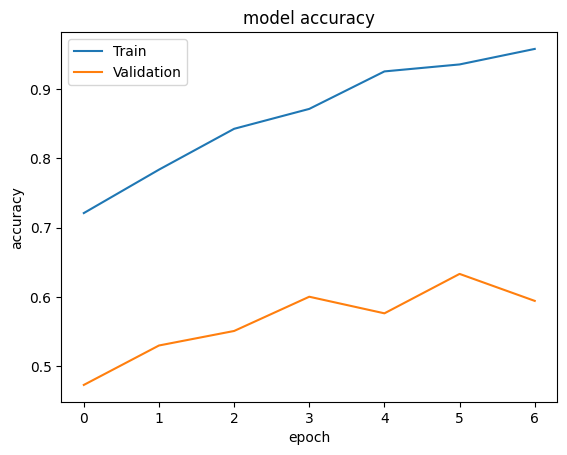

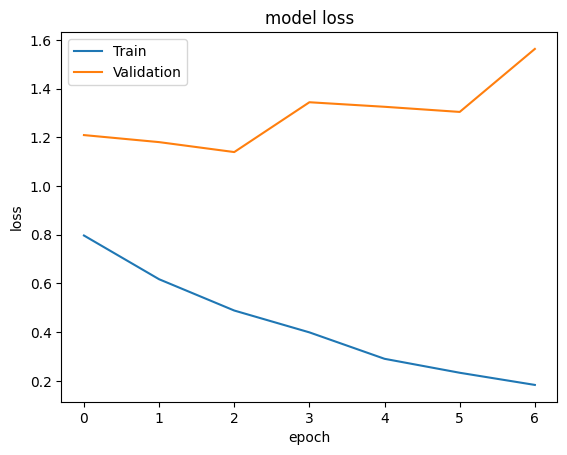

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Testing one image**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


#load the image you want to predict
img_path='/content/drive/MyDrive/Dataset for DL/BrainTumour/Testing/pituitary_tumor/image(1).jpg'
img=image.load_img(img_path,target_size=(64,64))

#converting the image into a numpy array
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)  #add batch dimension

#normalize the data
img_array /=255.

#making the prediction
prediction=model.predict(img_array)


#decoding the prediction
class_labels=['glicoma','mening','no tumour','pituitary']  #list of the class labels
predicted_class_indices=np.argmax(prediction,axis=1)
predicted_classes=[class_labels[idx] for idx in predicted_class_indices]
print("Predicted classes:",predicted_classes)

1/1 [==============================] - 0s 301ms/step
Predicted classes: ['pituitary']
